In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
X_digits, y_digits = load_digits(return_X_y=True)
np.shape(X_digits), np.shape(y_digits)

((1797, 64), (1797,))

<BarContainer object of 10 artists>

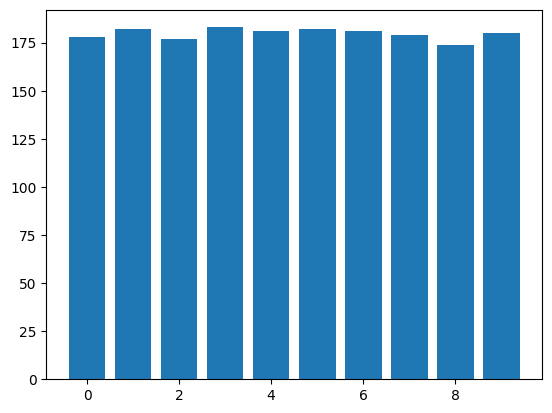

In [7]:
plt.bar(*np.unique(y_digits, return_counts=True))

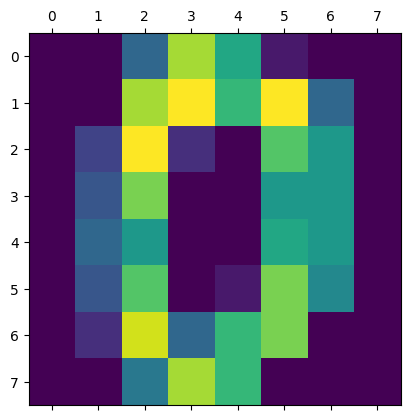

In [9]:
plt.matshow(X_digits[0].reshape(8,8))

<BarContainer object of 10 artists>

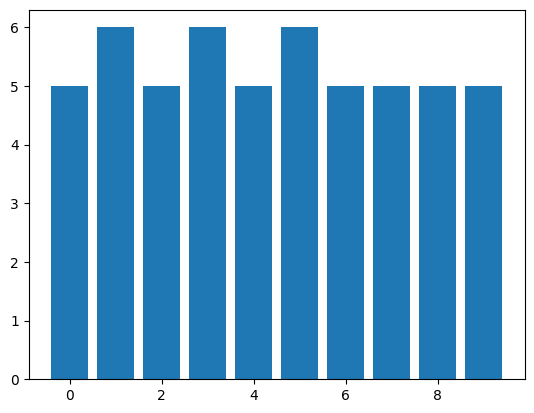

In [15]:
X_train_50, X_test, y_train_50, y_test = train_test_split(X_digits, y_digits, test_size=0.97, random_state=42, stratify=y_digits)
plt.bar(*np.unique(y_train_50, return_counts=True))

array([5, 5, 0, 8, 9, 3, 5, 9, 0, 8, 5, 2, 1, 6, 7, 7, 1, 0, 4, 8, 8, 7,
       6, 5, 4, 3, 5, 1, 6, 9, 7, 6, 3, 4, 2, 6, 4, 2, 3, 9, 2, 7, 0, 4,
       3, 1, 0, 2, 9, 1, 1, 8, 3])

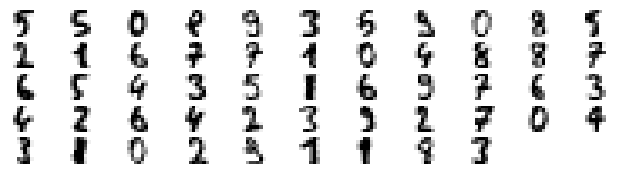

In [19]:
pat = 53
plt.figure(figsize=(8,2))
for index, digit in enumerate(X_train_50):
    plt.subplot(pat//10, 11, index+1)
    plt.imshow(digit.reshape(8,8), cmap='binary')
    plt.axis('off')
y_train_50

In [21]:
# Train on the small data (our 53 samples)
mlp50 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
mlp50.fit(X_train_50, y_train_50)

MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)

0.7423483583750695

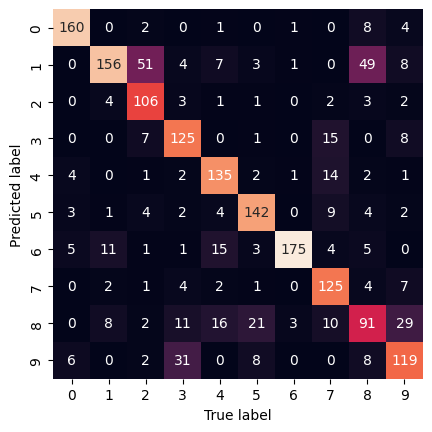

In [35]:
y_pred = mlp50.predict(X_digits)

# Evaluate on test set
cm = pd.DataFrame(confusion_matrix(y_digits, y_pred), columns=np.unique(y_test), index=np.unique(y_test))
sns.heatmap(cm.T, square=True, cbar=False, annot=True, fmt='d')
plt.xlabel('True label')
plt.ylabel('Predicted label')
mlp50.score(X_digits, y_digits)

In [26]:
# Import standard scaler (X-mu)/sigma
std_scale = StandardScaler()

# Fit scaler
std_scale.fit(X_digits)

# Scale data
X_digits_scaled = std_scale.transform(X_digits)

k = 53
k_means50 = KMeans(n_clusters=k, random_state=42)

# distance of each observation to each centroid
X_clusters = k_means50.fit_transform(X_digits)

np.shape(X_clusters)

(1797, 53)

In [27]:
pd.DataFrame(X_clusters).head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,49.731180,31.290739,43.957039,50.503593,10.841712,40.942261,50.634517,43.268262,42.197422,47.942919,...,46.471602,43.569401,18.217012,44.969944,40.618496,43.045312,45.063760,40.249951,39.058495,40.020247
1,28.702708,49.957961,45.161093,25.864342,56.443776,45.522756,33.596507,40.102899,44.131876,41.323372,...,46.673507,44.284281,56.459482,46.034140,49.324053,37.795488,37.578485,50.297203,37.219023,35.589608
2,39.133070,48.810709,45.064702,30.885436,51.063055,44.902881,41.867488,35.306409,50.209121,40.047978,...,46.336742,44.020505,48.700000,54.475009,52.272686,43.124999,26.717831,52.378990,40.249829,35.016229
3,44.994068,36.342783,51.329094,44.944914,45.128862,40.643576,48.466312,38.354172,14.834117,35.562540,...,52.304599,46.153244,43.916082,50.627483,51.822548,40.325743,40.586235,30.119489,39.331664,46.045288
4,46.206626,52.035304,52.458152,45.144416,47.282282,40.916542,30.160583,56.211587,49.433491,55.869505,...,48.293425,40.650803,49.518993,37.212329,53.815871,50.206562,44.650224,54.000543,48.435315,47.557173


In [28]:
# Which observation is closer (min distance) to each centroid
best_53_patterns = np.argmin(X_clusters, axis=0)
best_53_patterns

array([1227,  815, 1501, 1040,  877,  864,  410,  696,  259,  310,  384,
        360,  938,  251,  943,   56,  624,  162,  359,  841,  175, 1634,
       1402,  991, 1159,   40,  715, 1622,  881, 1545,   57, 1222, 1075,
       1536, 1161, 1485, 1698, 1788,  316,  501,  885, 1312,  573, 1711,
         58,  434, 1012,  438, 1253,  612,  944, 1537, 1295])

array([5, 5, 0, 8, 9, 3, 5, 9, 0, 8, 5, 2, 1, 6, 7, 7, 1, 0, 4, 8, 8, 7,
       6, 5, 4, 3, 5, 1, 6, 9, 7, 6, 3, 4, 2, 6, 4, 2, 3, 9, 2, 7, 0, 4,
       3, 1, 0, 2, 9, 1, 1, 8, 3])

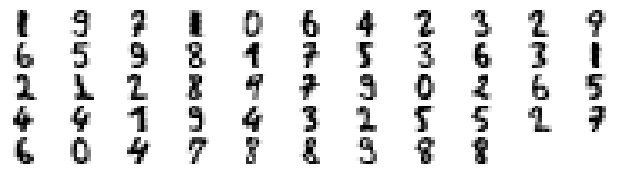

In [33]:
pat = 53
plt.figure(figsize=(8,2))
for index, digit in enumerate(X_digits[best_53_patterns]):
    plt.subplot(pat//10, 11, index+1)
    plt.imshow(digit.reshape(8,8), cmap='binary')
    plt.axis('off')
y_train_50

<BarContainer object of 10 artists>

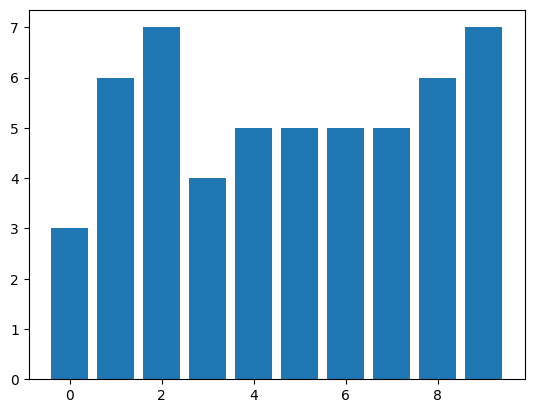

In [34]:
plt.bar(*np.unique(y_digits[best_53_patterns], return_counts=True))

In [36]:
# Train on the small data (our 53 samples from clustering)
mlp50c = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
mlp50c.fit(X_digits[best_53_patterns], y_digits[best_53_patterns])

MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)

0.8046744574290484

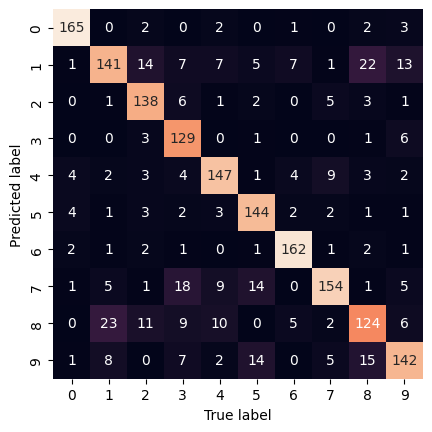

In [37]:
y_pred = mlp50c.predict(X_digits)

# Evaluate on test set
cm = pd.DataFrame(confusion_matrix(y_digits, y_pred), columns=np.unique(y_test), index=np.unique(y_test))
sns.heatmap(cm.T, square=True, cbar=False, annot=True, fmt='d')
plt.xlabel('True label')
plt.ylabel('Predicted label')
mlp50c.score(X_digits, y_digits)

### TO-DO Check: Sources and resources

- https://bdtechtalks.com/2021/01/04/semi-supervised-machine-learning/

- https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>